<a href="https://colab.research.google.com/github/lari98/LLM_Model/blob/main/Text_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuer Abschnitt

In [ ]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should return 1 or more
print(torch.cuda.get_device_name(0))  # Should return Tesla T4


True
1
Tesla T4


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

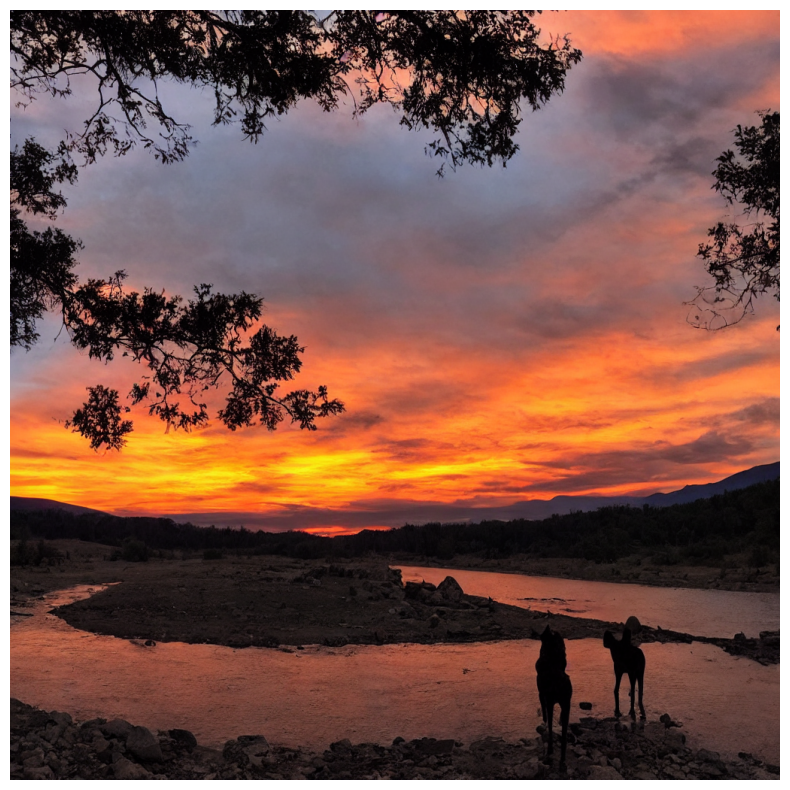

Image saved as 'generated_image_1.jpg'


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Load model
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16)
pipe.to(device)

# Prompt
prompt = "a beautiful sunset over the mountain with river and animal"

# Generate Image with higher resolution
image = pipe(prompt, guidance_scale=9.5, width=1024, height=1024).images[0]

# Convert Image to RGB Mode (Required for saving as JPG)
image = image.convert("RGB")

# Display Image
plt.figure(figsize=(10, 10))  # Increase display size
plt.imshow(image)
plt.axis("off")
plt.show()

# Save Image as JPG
image = image.convert("RGB")  # Convert to RGB before saving
image.save("generated_image.jpg", format="JPEG", quality=95)


print("Image saved as 'generated_image.jpg'")

